In [3]:
# parameters
mu = 0
sigma = 20

#hiperparameters
k = 500
n = 300
p = 1.5*sigma

In [4]:
import pandas as pd
import numpy as np

# implement tabularmark

# read dataset
data = pd.read_csv('synthetic_dataset_labeled.csv')

import random
# 使用random模块生成n个随机数种子
seeds = [random.randrange(4294967296) for _ in range(n)]  # 4294967296是2的32次方

# 将生成的种子保存到文件中
with open('tabularmark_seed.txt', 'w') as f:
    for seed in seeds:
        f.write(str(seed) + '\n')

if len(data) < n:
    raise ValueError("data中的记录数小于所请求的n个记录")

random_indices = random.sample(range(len(data)), n)

with open('tabularmark_index.txt', 'w') as findex:
    for index in random_indices:
        findex.write(str(index) + '\n')

print(f"{n}个随机索引已生成并保存到文件 'tabularmark_index.txt' 中。")

300个随机索引已生成并保存到文件 'tabularmark_index.txt' 中。


In [5]:
import pandas as pd
import random
import numpy as np

# 加载索引列表
with open('tabularmark_index.txt', 'r') as f:
    indices = [int(line.strip()) for line in f.readlines()]

# 加载种子列表
with open('tabularmark_seed.txt', 'r') as f:
    seeds = [int(line.strip()) for line in f.readlines()]


for idx, seed in zip(indices, seeds):
    np.random.seed(seed)
    intervals = np.linspace(-p, p, k+1)  # linspace 都是闭区间，因此我们需要31个点来构成30个区间
    # print(intervals)

    unit_domains = [(intervals[i], intervals[i+1]) for i in range(k)]
    # 打乱unit_domains
    np.random.shuffle(unit_domains)

    # 分割domains为green domains和red domains
    green_domains = unit_domains[:len(unit_domains)//2]
    red_domains = unit_domains[len(unit_domains)//2:]

    # 从green_domains的索引中随机选择一个
    domain_index = np.random.randint(0, len(green_domains))

    # 通过索引获取选择的域
    chosen_domain = green_domains[domain_index]

    # print("Green Domains:", green_domains)
    # print("Red Domains:", red_domains)
    # print(len(green_domains))
    # print(len(red_domains))
    
    # 从chosen_domain区间内随机选择一个数
    random_number = np.random.uniform(chosen_domain[0], chosen_domain[1])

    data.loc[idx, 'dimension_0'] += random_number

# 最后将修改后的数据集保存到CSV文件中
data.to_csv('watermarked_synthetic_dataset_labeled.csv', index=False)



/home/zhengyihao/anaconda3/envs/watermark/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


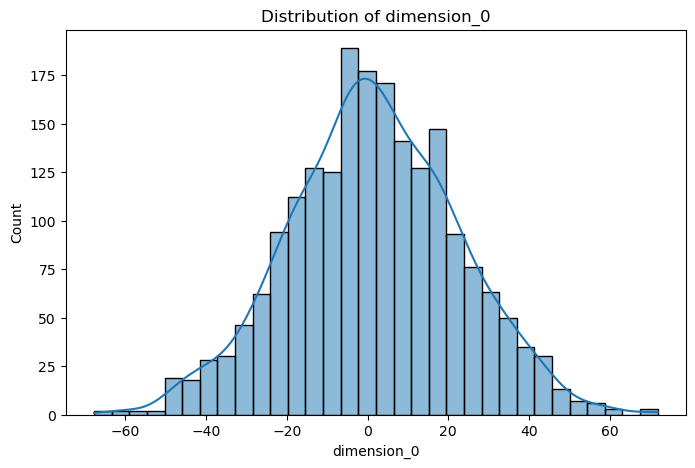

/home/zhengyihao/anaconda3/envs/watermark/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


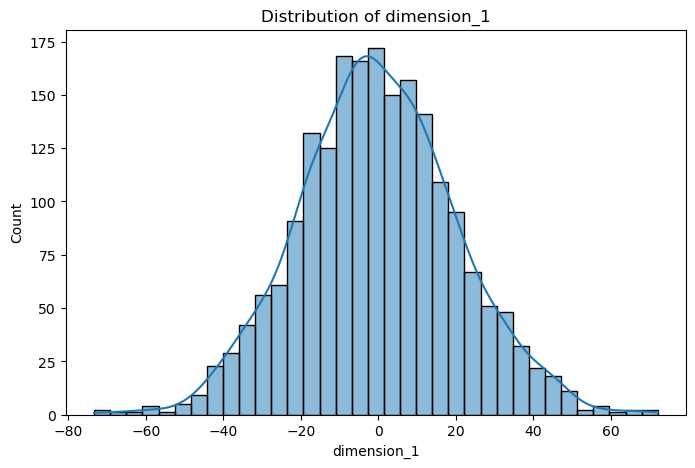

/home/zhengyihao/anaconda3/envs/watermark/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


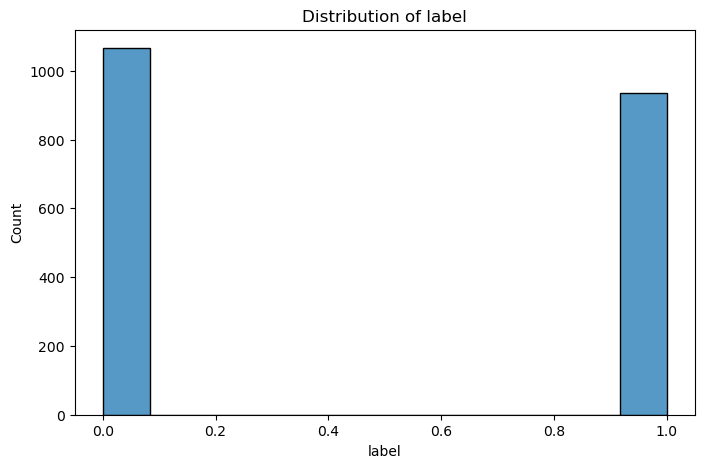

In [6]:
# plot data distribuiton
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据集
df = pd.read_csv('watermarked_synthetic_dataset_labeled.csv')

# 绘制 dimension_0 的分布图
plt.figure(figsize=(8, 5))
sns.histplot(df['dimension_0'], kde=True)
plt.title('Distribution of dimension_0')
plt.show()

# 绘制 dimension_1 的分布图
plt.figure(figsize=(8, 5))
sns.histplot(df['dimension_1'], kde=True)
plt.title('Distribution of dimension_1')
plt.show()

# 绘制 label 的分布图
plt.figure(figsize=(8, 5))
sns.histplot(df['label'], kde=False)
plt.title('Distribution of label')
plt.show()

### 水印检测

In [15]:
import pandas as pd
import random
import math
import numpy as np

# parameters
mu = 0
sigma = 20

#hiperparameters
k = 500
n = 300
p = 1.5*sigma

green_cell = 0

original_data = pd.read_csv("synthetic_dataset_labeled.csv")
data = pd.read_csv("watermarked_synthetic_dataset_labeled.csv")

# 加载索引列表
with open('tabularmark_index.txt', 'r') as f:
    indices = [int(line.strip()) for line in f.readlines()]

# 加载种子列表
with open('tabularmark_seed.txt', 'r') as f:
    seeds = [int(line.strip()) for line in f.readlines()]

for idx, seed in zip(indices, seeds):
    np.random.seed(seed)
    intervals = np.linspace(-p, p, k+1)  # linspace 都是闭区间，因此我们需要31个点来构成30个区间
    # print(intervals)

    unit_domains = [(intervals[i], intervals[i+1]) for i in range(k)]
    # 打乱unit_domains
    np.random.shuffle(unit_domains)

    # 分割domains为green domains和red domains
    green_domains = unit_domains[:len(unit_domains)//2]
    red_domains = unit_domains[len(unit_domains)//2:]

    deviation = data.loc[idx, 'dimension_0'] - original_data.loc[idx, 'dimension_0']
    # 初始设定 deviation 不在 green_domains 中
    in_green_domains = False

    # 遍历每一个 green_domains 元素
    for domain in green_domains:
        # 如果 deviation 在当前的 domain（区间）内
        if domain[0] <= deviation < domain[1]:
            # 设置 in_green_domains 为 True，然后跳出循环
            in_green_domains = True
            break

    if in_green_domains :
        green_cell += 1

print(green_cell)

# calculate z-score
z_score = (green_cell - n/2) / math.sqrt(n/4)

print("The z-score is ",z_score)
    
 

# # 最后将修改后的数据集保存到CSV文件中
# data.to_csv('watermarked_synthetic_dataset_labeled.csv', index=False)




300
The z-score is  17.32050807568877
